<a href="https://colab.research.google.com/github/GuilhermeFogolin/Estudos-Dados-FECAP/blob/main/03_PySpark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyspark

In [18]:
import pyspark
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("HelloWorld").getOrCreate()
sc = spark.sparkContext


In [19]:
lista=[1,2,3,4]
dobro=[]
for i in range(len(lista)):
  dobro.append(lista[i]*2)
print(dobro)

[2, 4, 6, 8]


In [20]:
lista=[65,66,67,68]
nums = sc.parallelize(lista, 2) # Dois nós do Cluster
mapping= nums.map(lambda x: chr(x)) # Função Python para converter número do caractere
result=mapping.collect()
print(result)

['A', 'B', 'C', 'D']


In [21]:
media=[10,5,10,8,5,10]

status=[]

for i in range(len(media)):
  if media[i]>=6:
    status.append("APROVADO")
  else:
    status.append("REPROVADO")
print(status)

['APROVADO', 'REPROVADO', 'APROVADO', 'APROVADO', 'REPROVADO', 'APROVADO']


In [22]:
media=[10,5,10,8,5,20]
nums = sc.parallelize(media,3)
mapping=nums.map(lambda x:"APROVADO" if x>=6 else "REPROVADO")
result=mapping.collect()
print(result)

['APROVADO', 'REPROVADO', 'APROVADO', 'APROVADO', 'REPROVADO', 'APROVADO']


In [23]:
numeros=[1,2,5,8,9,11,16,19,23]
nums=sc.parallelize(numeros,2)
mapping=nums.map(lambda x:"PAR" if x%2==0 else "IMPAR")
result=mapping.collect()
print(result)

['IMPAR', 'PAR', 'IMPAR', 'PAR', 'IMPAR', 'IMPAR', 'PAR', 'IMPAR', 'IMPAR']


In [14]:
import pandas as pd

def toDF(result):
    lista=[]
    for linha in result:
        dict_aux = {}
        dict_aux.update({"palavra": linha[0], "qtde": linha[1]})
        lista.append(dict_aux)
    df = pd.DataFrame(lista)
    return df


EXEMPLO 1 DE MAP REDUCE

In [24]:
#dados=["Bear","Bear","Car","Car","Car","Deer","Deer","River","River"]
dados=["B","B","C","C","C","D","D","R","R"]

input_file=sc.parallelize(dados,3)
mapping = input_file.map(lambda word:(word, 1))
print(mapping.collect())
count=mapping.reduceByKey(lambda a, b: a + b)
result=count.collect()
print(result)
df=toDF(result)
print(df)

#sc.stop()

[('B', 1), ('B', 1), ('C', 1), ('C', 1), ('C', 1), ('D', 1), ('D', 1), ('R', 1), ('R', 1)]
[('C', 3), ('D', 2), ('R', 2), ('B', 2)]
  palavra  qtde
0       C     3
1       D     2
2       R     2
3       B     2


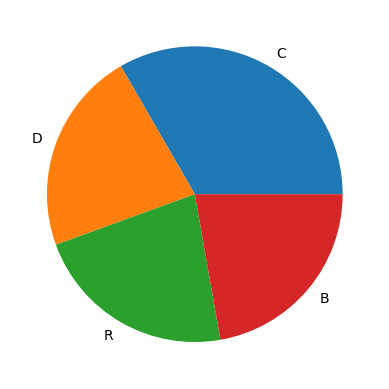

In [10]:
import matplotlib.pyplot as plt
#plt.bar(df["palavra"],df["qtde"])
plt.pie(df["qtde"],labels=df["palavra"])
plt.show()

EXEMPLO 2 DE MAP REDUCE

In [11]:
dados=["B","B","B","C","C","C","D","D D"]
item=["B","D"]
input_file=sc.parallelize(dados,3)
counts = (input_file.map(lambda word:(word, 1) if (word in item) else (word,0))
                     .reduceByKey(lambda a, b: a + b))

result=counts.collect()
print(result)
df=toDF(result)
df.query("qtde>0")


[('D D', 0), ('C', 0), ('D', 1), ('B', 3)]


,palavra,qtde
2,D,1
3,B,3


ENTENDENDO CÁLCULO LAMBDA <BR>

De maneira geral uma função lambda em Python é escrita da forma

**lambda** argumentos : expressão


In [12]:
# Função comum

def f3(x):
  result=x+1
  return result
# Função lambda

f1=lambda x:x+1

print("f3=",f3(10))
print("f1=",f1(10))


f3= 11
f1= 11


In [13]:
f2=lambda x,y:x+y
print(f2(3,5))

8


In [14]:
def febre2(tmp):
  status=""
  if tmp<37:
    status="NORMAL"
  elif tmp<38:
    status="FEBRIL"
  else:
    status="FEBRE"
  return status

febre=lambda tmp:"NORMAL" if tmp<37 else "FEBRIL" if tmp<38 else "FEBRE"

print("Função")
print(febre2(32))
print(febre2(37.8))
print(febre2(39))
print("Lambda")
print(febre(32))
print(febre(37.8))
print(febre(39))

Função
NORMAL
FEBRIL
FEBRE
Lambda
NORMAL
FEBRIL
FEBRE


In [16]:
par=lambda x:"PAR" if x%2==0 else "IMPAR"
print(par(2))
print(par(25))

PAR
IMPAR


In [17]:
IMC=lambda peso,altura:peso/(altura*altura) if altura>0 and altura<2.5 else "ERRO NA ALTURA"

print(IMC(87,1.85))
print(IMC(57,1.65))
print(IMC(57, 0))

25.420014609203797
20.936639118457304
ERRO NA ALTURA


In [ ]:
#SE IMC<20 ABAIXO DO PESO
#SE IMC>=20 e <25 NORMAL
#SE IMC>=25 OBESO

In [18]:
Status=lambda imc:"ABAIXO DO PESO" if imc<20 else "NORMAL" if imc<25 else "OBESO"
imc=IMC(150,1.85)
print(imc)
print(Status(imc))
imc=IMC(87,1.85)
print(imc)
print(Status(imc))
imc=IMC(60,1.85)
print(imc)
print(Status(imc))

43.827611395178955
OBESO
25.420014609203797
OBESO
17.531044558071585
ABAIXO DO PESO


In [19]:
f1=lambda x:x*2

lista=[1,2,3,4,5,6]
dobro=[]
for n in lista:
  dobro.append(f1(n))

print(dobro)

[2, 4, 6, 8, 10, 12]


In [20]:
lista=[1,2,3,4,5,6]
mapping=map(lambda x:f1(x), lista)
dobro=list(mapping)
print(dobro)

[2, 4, 6, 8, 10, 12]


In [21]:
lista=[10,5,7,8,4,6,1]
mapping=map(lambda nota:"APROVADO" if nota>=6 else "EXAME" if nota>=4 else "REPROVADO", lista)
dobro=list(mapping)
print(dobro)

['APROVADO', 'EXAME', 'APROVADO', 'APROVADO', 'EXAME', 'APROVADO', 'REPROVADO']


In [22]:
Status=lambda nota:"APROVADO" if nota>=6 else "EXAME" if nota>=4 else "REPROVADO"
lista=[10,5,7,8,4,6,1]
mapping=map(lambda nota:Status(nota) , lista)
dobro=list(mapping)
print(dobro)

['APROVADO', 'EXAME', 'APROVADO', 'APROVADO', 'EXAME', 'APROVADO', 'REPROVADO']


In [23]:
lista=[1,2,3,4,5,6]
filtro=filter(lambda x:x>2, lista)
maior=list(filtro)
print(maior)

[3, 4, 5, 6]


In [24]:
notas=[10,5,7,8,4,6,1]
aprovados=list(filter(lambda x:x>=6,notas))
print(aprovados)

[10, 7, 8, 6]


In [1]:
x=-190
print(abs(x))

190


In [2]:

z=map(lambda x:abs(x), [-1, -2, -3,-10])
print(list(z))


[1, 2, 3, 10]


In [3]:
z=map(str, [-1, -2, -3])
for i in z:
  print(i+"X")

-1X
-2X
-3X


In [4]:
z=map(lambda x:x*2, [10, 20, 30])
for i in z:
  print(i)

20
40
60


In [6]:
def dobro(x):
  return x*2

z=(map(dobro, [10, 20, 30]))
print(z)
#for i in z:
#  print(i)

listaZ=list(z)
print(listaZ)
dobro(2)

[20, 40, 60]


4

In [7]:
from functools import reduce

lista=[1, 2, 3, 4, 5, 6, 7, 8, 9, 15]
soma=list(map(lambda x: x+1, lista))
print(soma)

soma2=(reduce(lambda y,x: y+x, soma))
print(soma2)


[2, 3, 4, 5, 6, 7, 8, 9, 10, 16]
70


In [8]:
from functools import reduce

lista=[1, 2, 3, 4, 5, 6, 7, 18, 9, 10]
maior=reduce(lambda x,y: x if x>y else y, lista)
print(maior)

18


In [9]:
from functools import reduce
lista=[10, 25, 30, 40, 50, 60, 75, 80, 91, 100]
conta=list(map(lambda x:x%2, lista))
print(conta)
soma=reduce(lambda x,y:x+y, lista)
print(soma)

[0, 1, 0, 0, 0, 0, 1, 0, 1, 0]
561


In [10]:
from functools import reduce
lista=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
par=reduce(lambda x,y: x+1 if y%2 ==0 else x+0, lista)
print(par)

6


In [11]:
def par(num):
  ok=False
  if num%3==0:
    ok=True
  if num%5==0:
    ok=True
  return (ok)

lista=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
par=reduce(lambda x,y: x+1 if par(y) else x+0, lista)
print(par)

5


VOLTANDO UTILIZAR SPARK

In [12]:
lista=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
quadrado=list(map(lambda x: x**2,lista))
print(quadrado)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100]


In [25]:
lista=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
nums = sc.parallelize(lista,2)
quadrado=nums.map(lambda x: x**2).collect()
print(quadrado)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100]


In [26]:
dados=["B C D","B C D","B C","C B","D C B","C","D"]
input_file=sc.parallelize(dados,3)
mapping = input_file.map(lambda word:(word, 1))
print(mapping.collect())
count=mapping.reduceByKey(lambda a, b: a + b)
result=count.collect()
print(result)
#df=toDF(result)
#print(df)

[('B C D', 1), ('B C D', 1), ('B C', 1), ('C B', 1), ('D C B', 1), ('C', 1), ('D', 1)]
[('B C D', 2), ('D C B', 1), ('C B', 1), ('C', 1), ('D', 1), ('B C', 1)]


In [27]:
def func(w,lista):
    ok=False
    for i in lista:
        if i in w:
            ok=True
            break
    return ok

dados=["B C D","B C D","B C","C B","D C B","C","D"]
item=["B C","D C"]
input_file=sc.parallelize(dados,3)
mapping = input_file.map(lambda word:(word, 1) if (func(word,item)) else (word,0)) #\
                     #.reduceByKey(lambda a, b: a + b)
print(mapping.collect())
counts=mapping.reduceByKey(lambda a, b: a + b)
result=counts.collect()
print(result)
df=toDF(result)
dfaux=df.query("qtde>0")
dfaux

[('B C D', 1), ('B C D', 1), ('B C', 1), ('C B', 0), ('D C B', 1), ('C', 0), ('D', 0)]
[('B C D', 2), ('D C B', 1), ('C B', 0), ('C', 0), ('D', 0), ('B C', 1)]


,palavra,qtde
0,B C D,2
1,D C B,1
5,B C,1


In [28]:
def func(w,item):
    result=""
    print(w,"-",item)
    for i in item:
        if i in w:
            result=i
            break
    print(result)
    return result

dados=["ANA MARIA","ANA CLARA","MARIA MARCIA","JOÃO PEDRO","JOÃO CARLOS","CARLOS EDU","DANIEL"]
item=["JOÃO","MARIA"]
for w in dados:
  func(w,item)
input_file=sc.parallelize(dados,3)
mapping = input_file.map(lambda word:(func(word,item),1)\
                        if func(word,item)!="" else (word,0) )
                     #.reduceByKey(lambda a, b: a + b)
print(mapping.collect())
counts=mapping.reduceByKey(lambda a, b: a + b)
result=counts.collect()
print(result)
df=toDF(result)
dfaux=df.query("qtde>0")
dfaux

ANA MARIA - ['JOÃO', 'MARIA']
MARIA
ANA CLARA - ['JOÃO', 'MARIA']

MARIA MARCIA - ['JOÃO', 'MARIA']
MARIA
JOÃO PEDRO - ['JOÃO', 'MARIA']
JOÃO
JOÃO CARLOS - ['JOÃO', 'MARIA']
JOÃO
CARLOS EDU - ['JOÃO', 'MARIA']

DANIEL - ['JOÃO', 'MARIA']

[('MARIA', 1), ('ANA CLARA', 0), ('MARIA', 1), ('JOÃO', 1), ('JOÃO', 1), ('CARLOS EDU', 0), ('DANIEL', 0)]
[('MARIA', 2), ('ANA CLARA', 0), ('CARLOS EDU', 0), ('JOÃO', 2), ('DANIEL', 0)]


,palavra,qtde
0,MARIA,2
3,JOÃO,2


In [29]:
import requests

response = requests.get("https://www.uol.com.br/esporte/futebol/ultimas-noticias/2023/10/25/palmeiras-x-sao-paulo-brasileirao-rodada-29.htm")
print(response.text)

<!DOCTYPE html><html lang="pt-br"><head><meta charset="utf-8"><meta http-equiv="Content-Type" content="text/html; charset=utf-8"><title>Palmeiras massacra São Paulo, faz 5 no rival e dá um chute na crise</title><meta name="description" content="Com direito a &quot;olé&quot;, o Palmeiras goleou o São Paulo por 5 a 0, no Allianz Parque, em jogo válido pela 29ª rodada do Brasileirão."><meta name="format-detection" content="telephone=no"><meta name="twitter:card" content="summary_large_image"><meta name="twitter:description" content="Com direito a &quot;olé&quot;, o Palmeiras goleou o São Paulo na noite de hoje (25) por 5 a 0, no Allianz Parque, em jogo válido pela 29ª rodada do Brasileirão.O Verdão mandou no jogo desde o primeiro minuto e chegou a abrir o placar logo aos cinco min"><meta name="twitter:image" content="https://conteudo.imguol.com.br/c/esporte/9d/2023/10/25/breno-lopes-do-palmeiras-comemora-apos-marcar-contra-o-sao-paulo-pelo-brasileirao-1698278630855_v2_615x300.jpg"><meta n

LIMPA O TEXTO REMOVENDO TODO HTML

In [ ]:
from bs4 import BeautifulSoup as bs

soup = bs(response.text, 'html.parser')
texto = soup.get_text()
print(texto)


In [ ]:
input_file=sc.parallelize(response,4)
flat=input_file.flatMap(lambda line: line.split())
print(flat.collect())
mapping=flat.map(lambda word: (word, 1))
print(mapping.collect())
counts=mapping.reduceByKey(lambda a, b: a + b)
#counts = input_file.flatMap(lambda line: line.split()) \
#                     .map(lambda word: (word, 1)) \
#                     .reduceByKey(lambda a, b: a + b)

result=counts.collect()
print(result)
df=toDF(result)
df


In [ ]:
!pip install nltk

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
print(stopwords.words('portuguese'))

In [ ]:
termosExcluir=["em","do","faz","x","se","de","para","um","dois",".","!","-", "que",",","'",",","\\n","\n", "e", "a", "o","uol","da","sempre"]
stop = set(stopwords.words('portuguese'))
stopAll = stop.union(termosExcluir)
print(stopAll)

input_file=sc.parallelize(texto.upper().split(),3)
filtro=input_file.filter(lambda palavra: palavra.lower() not in stopAll)
print(filtro.collect())
mapping=filtro.map(lambda word: (word, 1))
print(mapping.collect())
counts =mapping.reduceByKey(lambda a, b: a + b)
result=counts.collect()
print(result)
df=toDF(result)
dfaux=df.query("qtde>=5")
dfaux.sort_values(by="qtde",ascending=False)

In [ ]:
response = requests.get("https://www.uol.com.br/esporte/futebol/ultimas-noticias/2023/10/25/palmeiras-x-sao-paulo-brasileirao-rodada-29.htm")
print(response.text)

soup = bs(response.text, 'html.parser')
texto = soup.get_text()

myWords=['palmeiras','santos','corinthians','são','paulo','mundial']
stopAll = myWords
print(stopAll)
input_file=sc.parallelize(texto.upper().split(),3)
filtro=input_file.filter(lambda palavra: palavra.lower() in stopAll)
print(filtro.collect())
mapping= filtro.map(lambda word: (word, 1))
print(mapping.collect())
counts=mapping.reduceByKey(lambda a, b: a + b)
result=counts.collect()
print(result)
df=toDF(result)
print(df)
dfaux=df.query("qtde>1")
dfaux.sort_values(by="qtde",ascending=False)

EXERCICIO RESOLVIDO
SELECIONE UMA PÁGINA QUALQUER, ESCOLHA ALGUMAS PALAVRAS QUE DEVEM INDICAR A RELEVÂNCOA DA PÁGINA E CONTE ESSAS PALAVRAS

In [ ]:
response =requests.get("https://www.ibm.com/br-pt/think/topics/machine-learning")


soup = bs(response.text, 'html.parser')
texto = soup.get_text()

myWords=['matemática','lógica','estatística','algoritmo','algoritmos','máquina']
stopAll = myWords
print(stopAll)
input_file=sc.parallelize(texto.upper().split(),3)
filtro=input_file.filter(lambda palavra: palavra.lower() in stopAll)
print(filtro.collect())
mapping= filtro.map(lambda word: (word, 1))
print(mapping.collect())
counts=mapping.reduceByKey(lambda a, b: a + b)
result=counts.collect()
print(result)
df=toDF(result)
print(df)
dfaux=df.query("qtde>1")
dfaux.sort_values(by="qtde",ascending=False)

In [ ]:
termosExcluir=["de","para","um","dois",".","!","-", "que",",","'",",","\\n","\n", "e", "a", "o"]

stop = set(stopwords.words('portuguese'))
stopAll = stop.union(termosExcluir)
print(stopAll)
input_file=sc.parallelize(texto.upper().split(),3) \
              .filter(lambda palavra: palavra.lower() not in termosExcluir)

counts = input_file.map(lambda word: (word, 1)) \
                   .reduceByKey(lambda a, b: a + b)
result=counts.collect()
#print(result)
df=toDF(result)
dfaux=df.query("qtde>5")
dfaux.sort_values(by="qtde",ascending=False)

A FUNÇÃO ABAIXO PRETENDE CONTAR APENAS TERMOS ESPECÍFICOS COMO "ANDERSON TORRES" e "ALEXANDRE DE MORAES".
HÁ UM ERRO NESSA SOLUÇÃO, TENTE IDENTIFICAR O ERRO E ENCONTRAR UMA SOLUÇÃO!!!!

In [ ]:
from bs4 import BeautifulSoup as bs

def func(w,itens):
    result=""
    for i in itens:
        if i in w:
            result=i
            break
    return result
url="https://www.uol.com.br/esporte/futebol/ultimas-noticias/2025/09/22/a-tabela-mais-tranquila-e-a-do-palmeiras-diz-juca-kfouri.htm"

response =requests.get(url)


soup = bs(response.text, 'html.parser')
parag = soup.find_all('p')
link=soup.find_all('a')
#tagDiv=soup.find_all('div')

linhas=[]
for i in range(len(parag)):
    linhas.append(parag[i].text.upper())

for i in range(len(link)):
    linhas.append(link[i].text.upper())

#for i in range(len(tagDiv)):
#    linhas.append(tagDiv[i].text.upper())

print(linhas)


itens=["PALMEIRAS","SÃO PAULO","CORINTHIANS","SANTOS","BRAGANTINO"]

input_file=sc.parallelize(linhas,3)

flat=input_file.flatMap(lambda line:line.split(","))
print(flat.collect())
mapping=flat.map(lambda word:(func(word,itens),1) if func(word,itens)!="" else (word,0) )
print(mapping.collect())
counts=mapping.reduceByKey(lambda a, b: a + b)
#counts = input_file.flatMap(lambda line:line.split(",")) \
#                   .map(lambda word:(func(word,itens),1) if func(word,itens)!="" else (word,0) )\
#                   .reduceByKey(lambda a, b: a + b)

result=counts.collect()
print(result)
df=toDF(result)
print(df)
dfaux=df.query("qtde>0")
dfaux

In [ ]:
lista=["https://www.uol.com.br/esporte/futebol/ultimas-noticias/2025/04/03/abel-cobra-agressividade-no-palmeiras-apos-susto-na-estreia-da-libertadores.htm",
       "https://www.uol.com.br/esporte/futebol/ultimas-noticias/gazeta-esportiva/2025/04/01/afastado-marcelo-mariano-trabalha-para-o-corinthians-em-final-e-explica-sempre-pronto-para-ajudar.htm",
       ]


linhas=[]
for pag in lista:
  response =requests.get(pag)
  soup = bs(response.text, 'html.parser')
  texto = soup.get_text()
  soup = bs(response.text, 'html.parser')
  parag = soup.find_all('p')
  link=soup.find_all('a')
  for i in range(len(parag)):
    linhas.append(parag[i].text.upper())
  for i in range(len(link)):
    linhas.append(link[i].text.upper())

itens=["PALMEIRAS","SÃO PAULO","CORINTHIANS","SANTOS","BRAGANTINO"]

input_file=sc.parallelize(linhas,3)

flat=input_file.flatMap(lambda line:line.split(","))
#print(flat.collect())
mapping=flat.map(lambda word:(func(word,itens),1) if func(word,itens)!="" else (word,0) )
#print(mapping.collect())
counts=mapping.reduceByKey(lambda a, b: a + b)
#counts = input_file.flatMap(lambda line:line.split(",")) \
#                   .map(lambda word:(func(word,itens),1) if func(word,itens)!="" else (word,0) )\
#                   .reduceByKey(lambda a, b: a + b)

result=counts.collect()
print(result)
df=toDF(result)
print(df)
dfaux=df.query("qtde>0")
dfaux

In [ ]:
f=lambda x:x if x>0 else -x

print(f(-10))


In [ ]:
q3=lambda x:x>6
lista=[10,10,2,5,6,4,7]
saida1=list(map(lambda x:q3(x), lista))
print(saida1)
saida1=list(filter(lambda x:q3(x), lista))
print(saida1)





In [ ]:
q4=lambda nota:"APROVADO" if nota>=6 else "EXAME 6" if nota>=4 \
                                     else"EXAME 7" if nota>=2 \
                                     else "REPROVADO"
print(q4(7))
print(q4(4.5))
print(q4(3.5))
print(q4(1.9))